<a href="https://colab.research.google.com/github/M-Jak/Finki/blob/main/Vnp/Lab%201/lab1_real_shit_od_terminot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
#requirements for colab
# install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome(options=options)
wd.get("https://play.google.com/store/apps")

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import warnings
import requests
requests.packages.urllib3.disable_warnings()


from selenium.webdriver.common.by import By

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Fetched 110 kB in 10s (11.4 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
21 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree.

In [115]:
def get_reviews(href):
  local_wd = webdriver.Chrome(options=options)
  local_wd.get(href)
  reviews_string = local_wd.find_element(By.CSS_SELECTOR, 'div.g1rdde').text.replace(" reviews","").replace("+","")
  if 'K' in reviews_string:
    reviews = float(reviews_string.replace("K",""))*1000
  elif 'M' in reviews_string:
    reviews = float(reviews_string.replace("M",""))*1000000
  return int(reviews)

In [121]:
items = []
divs = wd.find_elements(By.CSS_SELECTOR, 'div.VfPpkd-EScbFb-JIbuQc.UVEnyf') # VfPpkd-EScbFb-JIbuQc UVEnyf
links = wd.find_elements(By.CSS_SELECTOR, 'a.Si6A0c.ZD8Cqc')

for i in range(len(divs)):
  item = {}
  item_content = divs[i].text.replace('star',"").strip().split('\n')
  item['Name'] = item_content[0]
  item['Rating'] = float(item_content[1])
  item['Reviews'] = get_reviews(links[i].get_property('href'))
  print(item)
  items.append(item)
  if i == 23:
    break

df = pd.DataFrame(items)

{'Name': 'Instagram', 'Rating': 4.0, 'Reviews': 149000000}
{'Name': 'Snapchat', 'Rating': 4.1, 'Reviews': 33600000}
{'Name': 'TikTok', 'Rating': 4.3, 'Reviews': 59900000}
{'Name': 'Temu: Shop Like a Billionaire', 'Rating': 4.7, 'Reviews': 1480000}
{'Name': 'Messenger', 'Rating': 4.1, 'Reviews': 87800000}
{'Name': 'WhatsApp Messenger', 'Rating': 4.3, 'Reviews': 182000000}
{'Name': 'AT&T Personal Cloud', 'Rating': 4.4, 'Reviews': 11200}
{'Name': 'TextNow: Call + Text Unlimited', 'Rating': 4.5, 'Reviews': 1320000}
{'Name': 'SHEIN-Shopping Online', 'Rating': 4.5, 'Reviews': 6130000}
{'Name': 'Telegram', 'Rating': 4.3, 'Reviews': 13100000}
{'Name': 'Facebook', 'Rating': 3.4, 'Reviews': 137000000}
{'Name': 'Reddit', 'Rating': 2.8, 'Reviews': 3000000}
{'Name': 'Spotify: Music and Podcasts', 'Rating': 4.4, 'Reviews': 29800000}
{'Name': 'X', 'Rating': 3.8, 'Reviews': 21500000}
{'Name': 'Talkie: Soulful AI', 'Rating': 4.3, 'Reviews': 30500}
{'Name': 'Discord: Talk, Chat & Hang Out', 'Rating': 4.

Axes(0.125,0.11;0.775x0.77)


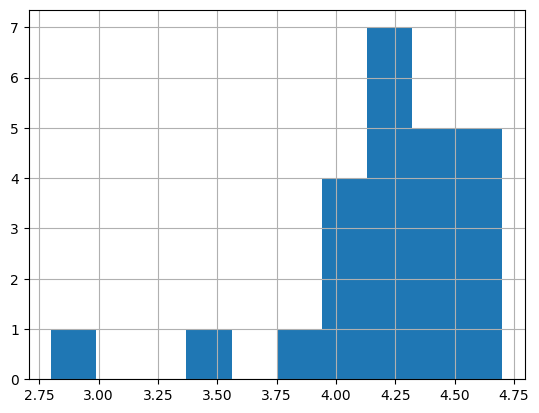

In [120]:
print(df.Rating.hist())

In [118]:
print(df.Reviews.min())

11200
